# Back propagation algorithm

## Perceptron learning algorithm (Recap)

<img src="imgs/perceptron.png">

Output is simply:
$$ y(x) = \mathbf{w^Tx} $$

The classifying hyperplane is simply $ y(x) = 0 $. $\mathbf{w}$ is therefore the normal vector to the classifying plane. Let's use this geometric interpretation to understand the perceptron learning algorithm (and later on backpropagation algorithm).

## Perceptron learning algorithm

Weights are updated using the following algorithm:
    

$$ \mathbf{w(n+1)} = \mathbf{w(n)} + \eta (t^k - o^k) \mathbf{x} $$

where, $t^k$ is the ground truth and $o^k$ is the obtained class for the kth output node.

The geometric interpretation of this is simply moving the weight vector towards the missclassified node. 

Let's try to train a perceptron on the iris dataset using the above equation, while visualizing the slope change.

In [1]:
# Import libraries
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

## Let's load some data to train a perceptron

In [2]:
# Import some data to play 
iris = datasets.load_iris()
X = iris.data[:100,:2]  # we only take 10 samples of the first two features.
Y = iris.target[:100]
ground_truth = Y

# Let's cheat a bit (center the distribution)
X[:,0] = X[:,0] - np.mean(X[:,0])
X[:,1] = X[:,1] - np.mean(X[:,1])

Let's center the distribution. This way, we can keep the threshold at 0 and not use biases (essentially a cheat). We can visualize the learning algorithm better this way.

In [3]:
# Line parameters
m = 1 # Slope
c = 0  # Intercept

In [4]:
# Creating line
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y1 = m*x1 + c

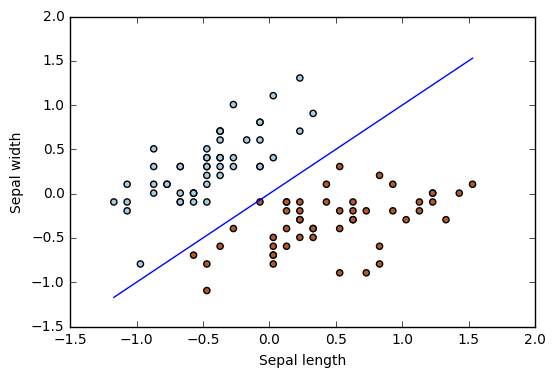

In [5]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(x1,y1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

## Perceptron Learning algorithm (implementation)

Let's start of with an intial set of weights and visualize the weight vector.

In [6]:
w = np.array([-0.1,0.6])

Line equation is
$$ \mathbf{w^Tx} = 0 $$

where $ w = \begin{bmatrix}
        0.1 \\
        0.2\\        
        \end{bmatrix} $
and $ x = \begin{bmatrix}
        I_1^1 & I_2^1 & I_3^1 & ... & I_n^1\\
        I_2^2 & I_2^2 & I_3^2 & ... & I_n^2\\        
        \end{bmatrix} $
        


In [7]:
# Calculate slopes
m = -w[0]/w[1]
c = 0
# Creating slope line
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y1 = m*x1 + c

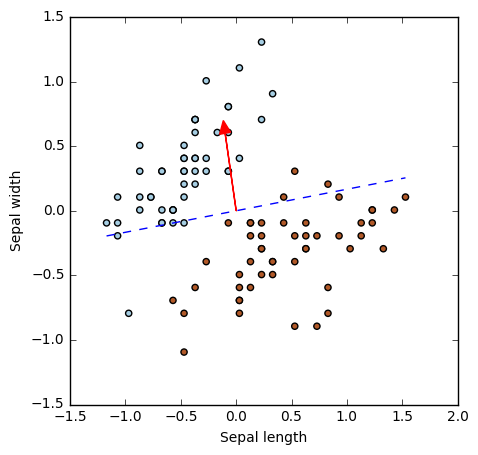

In [8]:
plt.figure(2, figsize=(5, 5))
ax = plt.axes()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(x1,y1,linestyle='--')  
ax.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1, fc='r', ec='r') # Weight vector
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [9]:
# Obtain classes
perceptron_output = (X.dot(w) < 0) + 0

# Compare
classification_status = (perceptron_output == ground_truth)
X_incorrect = X[np.logical_not(classification_status),:]
delta = ground_truth - perceptron_output
delta = -1 * delta[np.logical_not(classification_status)]

print("Classification_status:")
print(classification_status)
print("\nIncorrectly classified:")
print(np.sum(np.logical_not(classification_status)))

Classification_status:
[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

Incorrectly classified:
6


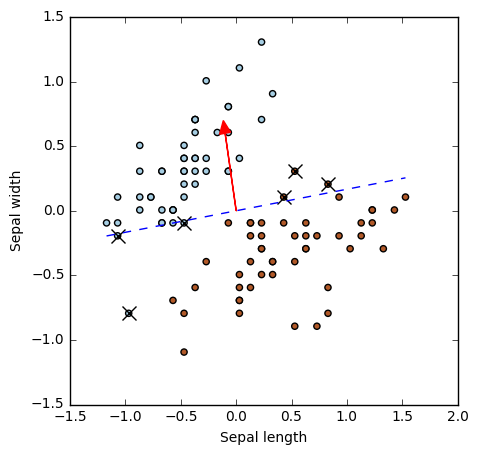

In [10]:
plt.figure(2, figsize=(5, 5))
ax = plt.axes()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(X_incorrect[:, 0], X_incorrect[:, 1],linestyle='None',color='k',marker='x', ms=10.0, mew=1.0)  
plt.plot(x1,y1,linestyle='--')  
ax.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1, fc='r', ec='r') # Weight vector
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

## Visualization of weight update

In [11]:
# Define a function for plotting
def plot_vectors(X,Y,X_incorrect,w,new_weight):   
    # Calculate slopes
    m = -w[0]/w[1]
    c = 0
    # Creating slope line
    x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    y1 = m*x1 + c
    # Plot    
    plt.figure(2, figsize=(6, 6))
    plt.clf()
    ax = plt.axes()
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.plot(X_incorrect[:, 0], X_incorrect[:, 1],linestyle='None',color='k',marker='x', ms=10.0, mew=1.0)  
    plt.plot(x1,y1,linestyle='--')  
    ax.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1, fc='r', ec='r') # Weight vector
    ax.arrow(0, 0, X_incorrect[0,0], X_incorrect[0,1], head_width=0.05, head_length=0.1, fc='k', ec='k') # Incorrect vector
    ax.arrow(0, 0, new_weight[0], new_weight[1], head_width=0.1, head_length=0.1, fc='g', ec='g') # Weight vector
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    # Set limits
    max_limit = np.max(np.max(np.abs(X)))
    plt.xlim(-max_limit, max_limit)
    plt.ylim(-max_limit, max_limit)

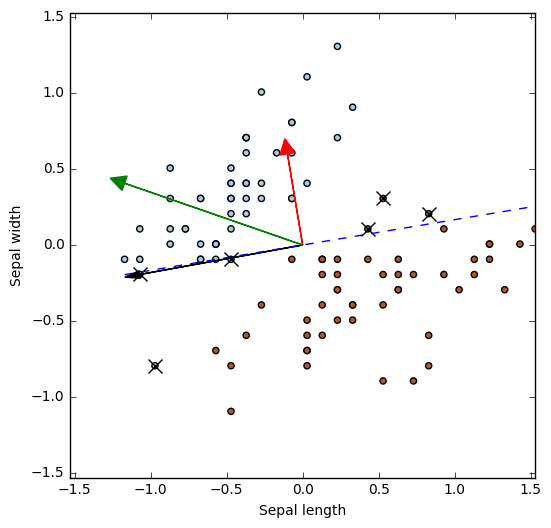

In [12]:
# Apply perceptron learning algorithm
learning_rate = 1
new_weight = w + learning_rate * delta[0] * X_incorrect[0,:]
# Plot old and new weight vectors, and the incorrect X
plot_vectors(X,Y,X_incorrect,w,new_weight)

In [13]:
# Obtain classes
w = deepcopy(new_weight)
perceptron_output = (X.dot(w) < 0) + 0

# Compare
classification_status = (perceptron_output == ground_truth)
X_incorrect = X[np.logical_not(classification_status),:]
delta = ground_truth - perceptron_output
delta = -1 * delta[np.logical_not(classification_status)]

print("Classification_status:")
print(classification_status)
print("\nIncorrectly classified:")
print(np.sum(np.logical_not(classification_status)))

Classification_status:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True False  True]

Incorrectly classified:
7


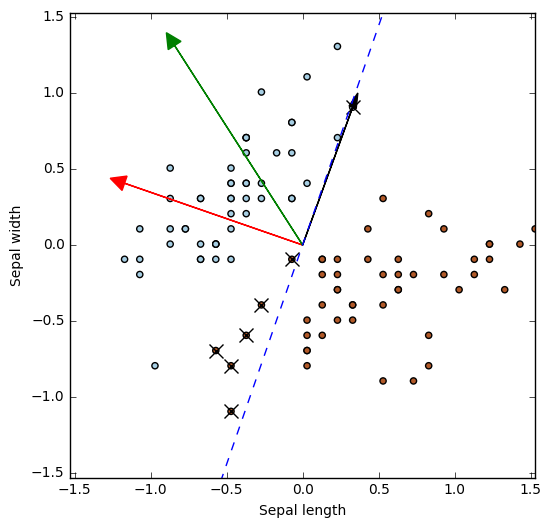

In [14]:
# Apply perceptron learning algorithm
learning_rate = 1
new_weight = w + learning_rate * delta[0] * X_incorrect[0,:]
# Plot old and new weight vectors, and the incorrect X
plot_vectors(X,Y,X_incorrect,w,new_weight)

## Solution space

<img src="imgs/solution-space.gif">

## Backpropagation




